In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score

In [3]:
dataset_url = "https://raw.githubusercontent.com/apogiatzis/breast-cancer-azure-ml-notebook/master/breast-cancer-data.csv"
dataset = pd.read_csv(dataset_url)

In [4]:
dataset.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
dataset.diagnosis.value_counts()
#Benign: Non Cancerous
#Malignant: Cancerous

B    357
M    212
Name: diagnosis, dtype: int64

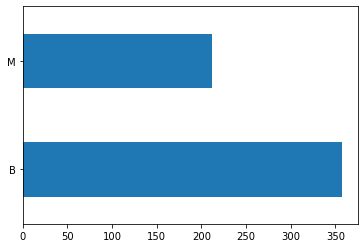

In [6]:
dataset.diagnosis.value_counts().plot(kind='barh')

In [7]:
dataset.diagnosis.value_counts()/len(dataset)*100

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

In [8]:
dataset.shape

(569, 33)

In [9]:
dataset['diagnosis'] = dataset['diagnosis'].map({'M': 1, 'B': 0})
dataset.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [10]:
dataset['diagnosis'].value_counts()/len(dataset)*100

0    62.741652
1    37.258348
Name: diagnosis, dtype: float64

In [11]:
X = dataset.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
y = dataset.diagnosis.values

In [12]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
len(X_train)

455

In [14]:
len(X_test)

114

In [15]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# Fitting RFClassifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
result = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(result)

Confusion Matrix
[[63  4]
 [ 2 45]]


In [19]:
result1 = classification_report(y_test, y_pred)
print('Classification Report')
print(result1)

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [20]:
result2 = accuracy_score(y_test, y_pred)
print('Accuracy: ', result2)

Accuracy:  0.9473684210526315


# Hyper Parameter Optimization

# Manual HPT

In [21]:
from sklearn.metrics import roc_auc_score

#leaf_size = [2,3,5,10]
n_estimators_list = [1,2,3,10, 50, 100, 200]

for estim_list in n_estimators_list:
    model = RandomForestClassifier(n_estimators=estim_list)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = confusion_matrix(y_test, y_pred)
    result2 = accuracy_score(y_test, y_pred)
    print('\n Estimator value: ', estim_list)
    print('Accuracy: ', result2)


 Estimator value:  1
Accuracy:  0.8421052631578947

 Estimator value:  2
Accuracy:  0.8508771929824561

 Estimator value:  3
Accuracy:  0.9298245614035088

 Estimator value:  10
Accuracy:  0.9385964912280702

 Estimator value:  50
Accuracy:  0.9298245614035088

 Estimator value:  100
Accuracy:  0.9473684210526315

 Estimator value:  200
Accuracy:  0.9385964912280702


In [22]:
leaf_size = [1,2,3,5,10]

In [23]:
for leaf_size in leaf_size:
    model = RandomForestClassifier(n_estimators=100, min_samples_leaf = leaf_size)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = confusion_matrix(y_test, y_pred)
    result2 = accuracy_score(y_test, y_pred)
    print('\n Leaf size: ', leaf_size)
    print('Accuracy: ', result2)


 Leaf size:  1
Accuracy:  0.9385964912280702

 Leaf size:  2
Accuracy:  0.9385964912280702

 Leaf size:  3
Accuracy:  0.9385964912280702

 Leaf size:  5
Accuracy:  0.9385964912280702

 Leaf size:  10
Accuracy:  0.9385964912280702


# Randomized Search

In [24]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [25]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 8, 10, 20 , 50, 100, 200]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20, 50, 100]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 3, 4, 5, 8, 10, 20, 50, 100, 200], 'min_samples_leaf': [1, 2, 4, 10, 20, 50, 100], 'bootstrap': [True, False]}


On each iteration, the algorithm will choose a different combination of the features. Altogether, there are 2 * 12  * 10 * 7  * 10 = 16800 settings! However, the benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values.

In [33]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4, 10, 20,
                                                             50, 100],
                                        'min_samples_split': [2, 3, 4, 5, 8, 10,
                                                              20, 50, 100,
                                                              200],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]})

In [27]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [34]:
base_model = RandomForestClassifier(n_estimators = 5, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Accuracy = 0.93%.


In [35]:
best_random = rf_random.best_estimator_
print(best_random)

RandomForestClassifier(max_depth=80, min_samples_split=3, n_estimators=300)


In [36]:
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Accuracy = 0.94%.


In [37]:
best_random

RandomForestClassifier(max_depth=80, min_samples_split=3, n_estimators=300)

In [38]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.94%.


# Grid Search

In [46]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [75, 80, 85, 90, 95, 100],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [200, 250, 270, 300, 350, 400, 450, 500]
}

In [47]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [75, 80, 85, 90, 95, 100],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [200, 250, 270, 300, 350, 400, 450, 500]
}
# Create a based model
rf_gd = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_gd, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

This will try out 120 combinations of settings. We can fit the model, display the best hyperparameters, and evaluate performance:

In [48]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 350}

In [49]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Accuracy = 0.94%.


In [50]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.94%.


In [51]:
best_grid

RandomForestClassifier(max_depth=80, max_features=3, min_samples_split=8,
                       n_estimators=350)

We achieved an unspectacular improvement in accuracy of X%. Depending on the application though, this could be a significant benefit. We can further improve our results by using grid search to focus on the most promising hyperparameters ranges found in the random search.

## Balancing out the data

In [52]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [53]:
X_train_n

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se
338,10.050,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,0.2619,2.0150,1.778,16.85,0.007803,0.014490,0.01690,0.008043,0.02100
427,10.800,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,0.3077,1.6210,2.240,20.20,0.006543,0.021480,0.02991,0.010450,0.01844
406,16.140,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,0.2387,0.6372,1.729,21.83,0.003958,0.012460,0.01831,0.008747,0.01500
96,12.180,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,0.3661,1.5110,2.410,24.44,0.005433,0.011790,0.01131,0.015190,0.02220
490,12.250,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,0.2239,1.1390,1.577,18.04,0.005096,0.012050,0.00941,0.004551,0.01608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,0.04996,0.3283,0.8280,2.363,36.74,0.007571,0.011140,0.02623,0.014630,0.01930
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,0.5079,1.2470,3.267,30.48,0.006836,0.008982,0.02348,0.006565,0.01942
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,0.06447,0.3539,4.8850,2.230,21.69,0.001713,0.006736,0.00000,0.000000,0.03799


In [54]:
from imblearn.combine import SMOTEENN

In [55]:
sm = SMOTEENN()

In [57]:
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [58]:
len(X_train_resampled)

535

In [60]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_resampled = sc.fit_transform(X_train_resampled)
X_test = sc.transform(X_test)


# Fitting RFClassifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_smote = RandomForestClassifier(n_estimators=100)
classifier_smote.fit(X_train_resampled, y_train_resampled)


# Predicting the Test set results
y_pred_smote = classifier_smote.predict(X_test)

result1 = classification_report(y_test, y_pred_smote)
print('Classification Report')
print(result1)

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        67
           1       0.90      0.96      0.93        47

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [61]:
result2 = accuracy_score(y_test, y_pred_smote)
print('Accuracy: ', result2)

Accuracy:  0.9385964912280702


In [62]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [75, 80, 85, 90, 95, 100],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [200, 250, 270, 300, 350, 400, 450, 500]
}
# Create a based model
rf_gd = RandomForestClassifier()
# Instantiate the grid search model
grid_search_smote = GridSearchCV(estimator = rf_gd, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [63]:
# Fit the grid search to the data
grid_search_smote.fit(X_train_resampled, y_train_resampled)
grid_search_smote.best_params_

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


{'bootstrap': True,
 'max_depth': 75,
 'max_features': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 250}

In [64]:
best_grid_smote = grid_search_smote.best_estimator_
grid_accuracy_smote = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Accuracy = 0.93%.
Improvement of 0.94%.
